# 1. Data Exploration, Cleaning, and Preprocessing

## Setup - Load Libraries and Data

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
# Load data
ames_raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

## Initial Exploratory Data Analysis

In [4]:
# Shape of the dataset
ames_raw.shape

(2580, 81)

In [5]:
# Datatypes, missing values, etc.
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [6]:
# First few rows
ames_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [10]:
# Categorize columns by data type
numeric_cols = ames_raw.select_dtypes(include=[np.number]).columns
categorical_cols = ames_raw.select_dtypes(include=[object]).columns

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(categorical_cols) == ames_raw.shape[1])

True


In [11]:
# Print the numeric columns
print(numeric_cols)

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


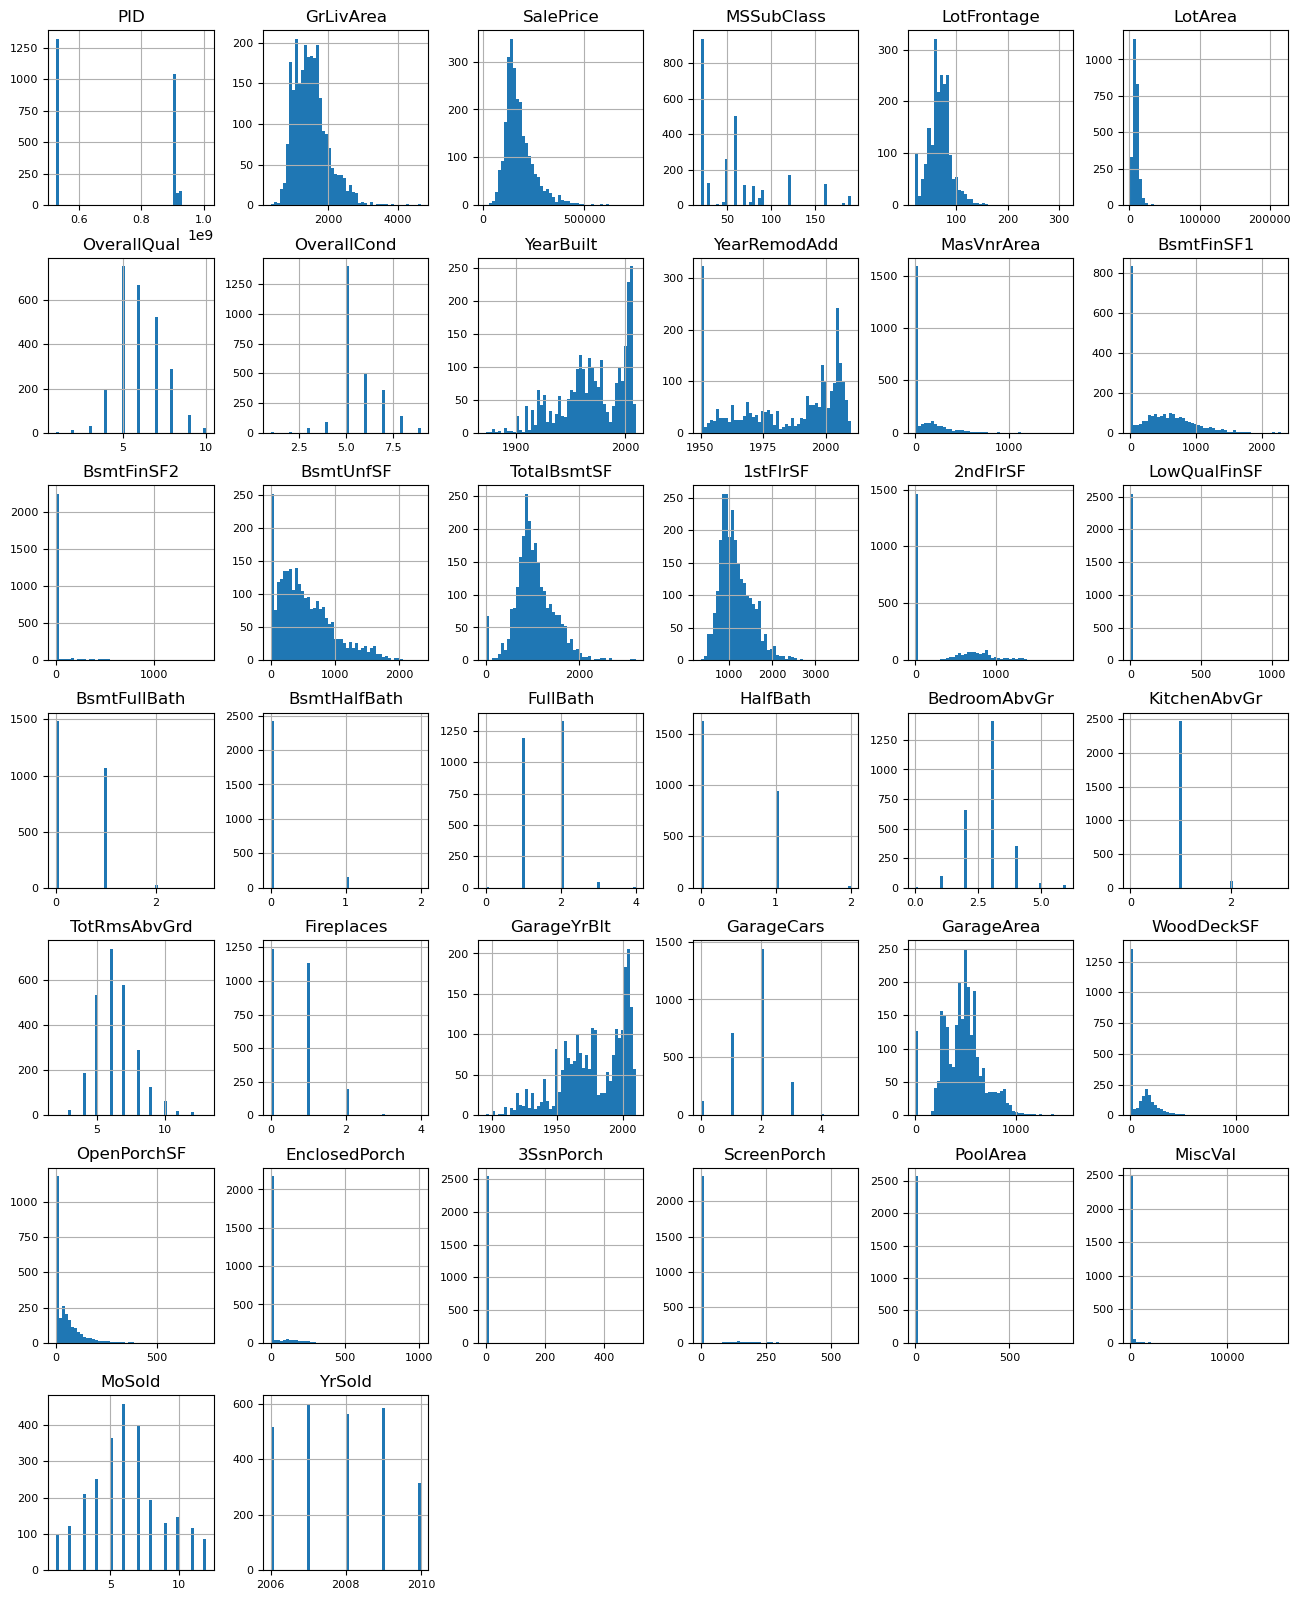

In [12]:
# Plot hists of numeric columns
ames_raw[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

One of the issues we see here is that some of these numeric categories are really ordinal categorical columns

In [13]:
# Print the categorical columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
# Get count of values for each categorical column
for col in categorical_cols:
    print(col)
    print(ames_raw[col].value_counts())
    print()
    

MSZoning
RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Street
Pave    2570
Grvl      10
Name: Street, dtype: int64

Alley
Grvl    105
Pave     63
Name: Alley, dtype: int64

LotShape
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

LandContour
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64

Utilities
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

LotConfig
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

LandSlope
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42

In [20]:
# Check for duplicate rows
ames_raw.duplicated().sum()

1

In [19]:
# Check for missing values
missing_values = ames_raw.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64


## Data Cleaning

In [15]:
# Create a copy
ames_clean = ames_raw.copy()

In [16]:
# Remove duplicates
ames_clean.drop_duplicates(inplace=True)
ames_clean.shape

(2579, 81)

In [17]:
# Drop the PID column
ames_clean.drop('PID', axis=1, inplace=True)
ames_clean.shape

(2579, 80)

In [18]:
# Reset the index
ames_clean.reset_index(drop=True, inplace=True)

# START HERE TO REPLACE MISSING VALUES

In [ ]:
# Replace missing values

if ames_clean['LotFrontage'].fillna(0, inplace=True):
    print('LotFrontage missing values replaced with 0')

if 


In [29]:
# If column has string data, replace missing values with 'none'; if column has numeric data, replace missing values with 0
for col in ames_clean.columns:
    if ames_clean[col].isnull().any():
        if ames_clean[col].dtype == 'object':
            ames_clean[col].fillna('none', inplace=True)
        elif ames_clean[col].dtype in ['float64', 'int64']:
            ames_clean[col].fillna(0, inplace=True)

# Check for missing values
print(ames_clean.isnull().sum().any())

False


## Feature Engineering

In [ ]:
# Classify columns into numeric, ordinal categorical, and nominal categorical to facilitate one-hot encoding

numeric_cols = ['GrLivArea', 
                'SalePrice', 
                'MSSubClass', 
                'LotFrontage', 
                'LotArea', 
                'OverallQual', 
                'OverallCond'
                ]

ordinal_categorical_cols = [' ']

nominal_categorical_cols = [' ']

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(ordinal_categorical_cols) + len(nominal_categorical_cols) == ames_raw.shape[1])


## Save Clean Data with Engineered Features

In [37]:
# Output file
ames_clean.to_csv('data/Ames_Housing_Price_Data_clean.csv', index=False)